# Text Representation with Feature Engineering

## Exploring Traditional Statistical Models

Feature Engineering is often known as the secret sauce to creating superior and better performing machine learning models. The importance of feature engineering is even more important for unstructured, textual data because we need to convert free flowing text into some numeric representations which can then be understood by machine learning algorithms.

Here we will explore the following feature engineering techniques:

- Bag of Words Model (TF)
- Bag of N-grams Model
- TF-IDF Model
- Similarity Features

# Prepare a Sample Corpus

Let’s now take a sample corpus of documents on which we will run most of our analyses in this article. A corpus is typically a collection of text documents usually belonging to one or more subjects or domains.

In [2]:

import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


You can see that we have taken a few sample text documents belonging to different categories for our toy corpus. Before we talk about feature engineering, as always, we need to do some data pre-processing or wrangling to remove unnecessary characters, symbols and tokens.

# Simple Text Pre-processing

Since the focus of this unit is on feature engineering, we will build a simple text pre-processor which focuses on removing special characters, extra whitespaces, digits, stopwords and lower casing the text corpus.

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keiziapurba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keiziapurba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

# Bag of Words Model - TF

This is perhaps the most simple vector space representational model for unstructured text. A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature\attribute. The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values. The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

Thus you can see that our documents have been converted into numeric vectors such that each document is represented by one vector (row) in the above feature matrix. The following code will help represent this in a more easy to understand format.

In [6]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


This should make things more clearer! You can clearly see that each column or dimension in the feature vectors represents a word from the corpus and each row represents one of our documents. The value in any cell, represents the number of times that word (represented by column) occurs in the specific document (represented by row). Hence if a corpus of documents consists of N unique words across all the documents, we would have an N-dimensional vector for each of the documents.

# Bag of N-Grams Model

A word is just a single token, often known as a unigram or 1-gram. We already know that the Bag of Words model doesn’t consider order of words. But what if we also wanted to take into account phrases or collection of words which occur in a sequence? N-grams help us achieve that. An N-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence. Bi-grams indicate n-grams of order 2 (two words), Tri-grams indicate n-grams of order 3 (three words), and so on. The Bag of N-Grams model is hence just an extension of the Bag of Words model so we can also leverage N-gram based features. The following example depicts bi-gram based features in each document feature vector.

In [7]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


This gives us feature vectors for our documents, where each feature consists of a bi-gram representing a sequence of two words and values represent how many times the bi-gram was present for our documents.

# TF-IDF Model

There are some potential problems which might arise with the Bag of Words model when it is used on large corpora. Since the feature vectors are based on absolute term frequencies, there might be some terms which occur frequently across all documents and these may tend to overshadow other terms in the feature set. The TF-IDF model tries to combat this issue by using a scaling or normalizing factor in its computation. TF-IDF stands for Term Frequency-Inverse Document Frequency, which uses a combination of two metrics in its computation, namely: term frequency (tf) and inverse document frequency (idf). This technique was developed for ranking results for queries in search engines and now it is an indispensable model in the world of information retrieval and NLP.

Mathematically, we can define TF-IDF as tfidf = tf x idf, which can be expanded further to be represented as follows.

Here, tfidf(w, D) is the TF-IDF score for word w in document D.

- The term tf(w, D) represents the term frequency of the word w in document D, which can be obtained from the Bag of Words model.
- The term idf(w, D) is the inverse document frequency for the term w, which can be computed as the log transform of the total number of documents in the corpus C divided by the document frequency of the word w, which is basically the frequency of documents in the corpus where the word w occurs.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


The TF-IDF based feature vectors for each of our text documents show scaled and normalized values as compared to the raw Bag of Words model values.

# Document Similarity

Document similarity is the process of using a distance or similarity based metric that can be used to identify how similar a text document is with any other document(s) based on features extracted from the documents like bag of words or tf-idf.

Thus you can see that we can build on top of the tf-idf based features we engineered in the previous section and use them to generate new features which can be useful in domains like search engines, document clustering and information retrieval by leveraging these similarity based features.

Pairwise document similarity in a corpus involves computing document similarity for each pair of documents in a corpus. Thus if you have C documents in a corpus, you would end up with a C x C matrix such that each row and column represents the similarity score for a pair of documents, which represent the indices at the row and column, respectively. There are several similarity and distance metrics that are used to compute document similarity. These include cosine distance/similarity, euclidean distance, manhattan distance, BM25 similarity, jaccard distance and so on. In our analysis, we will be using perhaps the most popular and widely used similarity metric, cosine similarity and compare pairwise document similarity based on their TF-IDF feature vectors.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


Cosine similarity basically gives us a metric representing the cosine of the angle between the feature vector representations of two text documents. Lower the angle between the documents, the closer and more similar they are as depicted in the following figure.

Looking closely at the similarity matrix clearly tells us that documents (0, 1 and 6), (2, 5 and 7) are very similar to one another and documents 3 and 4 are slightly similar to each other but the magnitude is not very strong, however still stronger than the other documents. This must indicate these similar documents have some similar features. This is a perfect example of grouping or clustering that can be solved by unsupervised learning especially when you are dealing with huge corpora of millions of text documents.

# Clustering using Document Similarity Features

We will use a very popular partition based clustering method, K-means clustering to cluster or group these documents based on their similarity based feature representations. In K-means clustering, we have an input parameter k, which specifies the number of clusters it will output using the document features. This clustering method is a centroid based clustering method, where it tries to cluster these documents into clusters of equal variance. It tries to create these clusters by minimizing the within-cluster sum of squares measure, also known as inertia.

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(similarity_matrix)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


We can see from the above output that our documents were correctly assigned to the right clusters!

## Exploring Word Embeddings with New Deep Learning Models

Traditional (count-based) feature engineering strategies for textual data involve models belonging to a family of models popularly known as the Bag of Words model. This includes term frequencies, TF-IDF (term frequency-inverse document frequency), N-grams and so on. While they are effective methods for extracting features from text, due to the inherent nature of the model being just a bag of unstructured words, we lose additional information like the semantics, structure, sequence and context around nearby words in each text document.

This forms as enough motivation for us to explore more sophisticated models which can capture this information and give us features which are vector representation of words, popularly known as embeddings.

Here we will explore the following feature engineering techniques:

- Word2Vec
- GloVe
- FastText

Predictive methods like Neural Network based language models try to predict words from its neighboring words looking at word sequences in the corpus and in the process it learns distributed representations giving us dense word embeddings. We will be focusing on these predictive methods in this article.

# The Word2Vec Model

This model was created by Google in 2013 and is a predictive deep learning based model to compute and generate high quality, distributed and continuous dense vector representations of words, which capture contextual and semantic similarity. Essentially these are unsupervised models which can take in massive textual corpora, create a vocabulary of possible words and generate dense word embeddings for each word in the vector space representing that vocabulary.

Usually you can specify the size of the word embedding vectors and the total number of vectors are essentially the size of the vocabulary. This makes the dimensionality of this dense vector space much lower than the high-dimensional sparse vector space built using traditional Bag of Words models.

There are two different model architectures which can be leveraged by Word2Vec to create these word embedding representations. These include,

- The Continuous Bag of Words (CBOW) Model
- The Skip-gram Model

## 1. The Continuous Bag of Words (CBOW) Model

The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).

Considering a simple sentence, “the quick brown fox jumps over the lazy dog”, this can be pairs of (context_window, target_word) where if we consider a context window of size 2, we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on.

Thus the model tries to predict the target_word based on the context_window words.

## 2. The Skip-gram Model

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the center word).

Considering our simple sentence from earlier, “the quick brown fox jumps over the lazy dog”. If we used the CBOW model, we get pairs of (context_window, target_word) where if we consider a context window of size 2, we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on.

Now considering that the skip-gram model’s aim is to predict the context from the target word, the model typically inverts the contexts and targets, and tries to predict each context word from its target word. Hence the task becomes to predict the context [quick, fox] given target word ‘brown’ or [the, brown] given target word ‘quick’ and so on.

Thus the model tries to predict the context_window words based on the target_word.

# Robust Word2Vec Model with Gensim

The **gensim** framework, created by Radim Řehůřek consists of a robust, efficient and scalable implementation of the Word2Vec model. We will leverage the same on our sample toy corpus. In our workflow, we will tokenize our normalized corpus and then focus on the following four parameters in the Word2Vec model to build it.

- **size**: The word embedding dimensionality
- **window**: The context window size
- **min_count**: The minimum word count
- **sample**: The downsample setting for frequent words
- **sg**: Training model, 1 for skip-gram otherwise CBOW

We will build a simple Word2Vec model on the corpus and visualize the embeddings.

In [11]:
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, epochs=5000)
w2v_model

/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


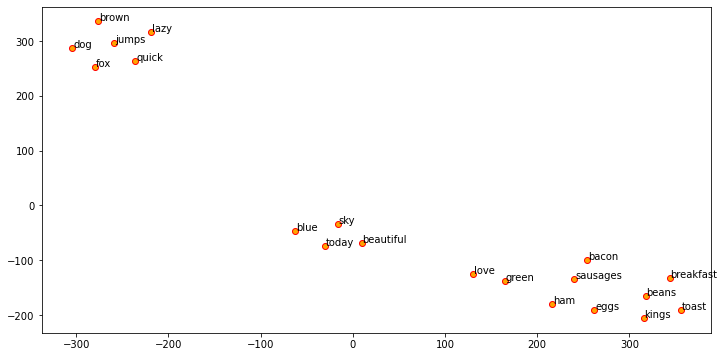

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [13]:
w2v_model.wv['sky'], w2v_model.wv['sky'].shape

(array([-0.63943213, -0.02467916,  1.502709  ,  0.61027026, -0.7216693 ,
        -0.3160052 ,  0.965002  ,  1.0018466 , -0.23420393,  0.7054972 ,
         0.5145384 ,  0.87736785, -0.7516157 , -0.47060892,  0.07128179],
       dtype=float32),
 (15,))

In [14]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,-0.639432,-0.024679,1.502709,0.610270,-0.721669,-0.316005,0.965002,1.001847,-0.234204,0.705497,0.514538,0.877368,-0.751616,-0.470609,0.071282
blue,-0.602743,0.073659,0.724945,0.157942,-0.789465,0.215237,0.614432,0.679531,-0.048113,0.658686,0.095931,0.815805,-0.159200,-0.532422,-0.248695
lazy,-0.988989,0.319340,0.843687,-1.026609,-0.590684,0.173463,0.259514,-0.637999,0.504987,0.112339,-0.474345,1.303706,-0.684338,-1.083380,0.311884
beautiful,-0.544188,-0.353933,1.410363,0.720159,-0.013280,-0.414286,0.896078,0.552768,-0.145792,1.038409,0.312691,0.896521,-0.635649,-0.480671,0.334769
quick,-0.789416,0.323791,0.290438,-0.849889,-0.650918,0.278436,-0.141102,-0.187405,0.451341,0.482975,0.027598,1.579678,-0.351136,-1.142641,0.484352
brown,-0.712770,0.695081,0.521078,-0.705848,-1.008142,0.141744,0.080199,-0.064908,0.848459,-0.062610,-0.022713,1.501421,-0.514936,-0.974268,0.667429
fox,-0.896241,0.404933,0.753256,-0.695366,-0.435905,0.327127,-0.346009,-0.465849,0.637149,0.599076,-0.256180,1.590770,-0.236885,-0.898548,0.597680
dog,-0.949771,0.453110,0.776009,-0.624677,-0.637290,0.142310,-0.439198,-0.422219,0.756097,0.316867,0.205115,1.447336,-0.020938,-0.981581,0.459399
sausages,0.198648,0.176316,1.074163,-0.299473,1.010429,0.748644,-0.166153,0.556175,-0.244341,0.325445,0.850126,-0.310548,-0.408820,-0.935457,0.673599
ham,0.297497,0.631223,1.108528,0.457518,1.037477,1.027660,-0.164433,0.289555,-0.268838,-0.167446,0.689474,0.043164,-0.524910,-0.758180,0.730475


## Looking at term semantic similarity

In [15]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,blue,lazy,beautiful,quick,brown,fox,dog,sausages,ham,bacon,eggs,love,breakfast,kings,green,jumps,toast,beans,today
sky,1.000000,0.884443,0.404548,0.928573,0.403114,0.446656,0.376840,0.388981,0.293115,0.277195,0.349490,0.310484,0.670830,0.134928,0.197749,0.421173,0.311042,0.172593,0.185005,0.962221
blue,0.884443,1.000000,0.544603,0.769207,0.599867,0.584544,0.544614,0.545837,0.151053,0.112449,0.238992,0.161952,0.448391,0.067489,0.083450,0.277041,0.522448,0.100712,0.094574,0.871930
lazy,0.404548,0.544603,1.000000,0.386370,0.906429,0.899321,0.914341,0.878318,0.123732,0.101477,0.115611,0.104955,0.098807,0.204776,0.200766,0.139880,0.944066,0.173519,0.202247,0.341223
beautiful,0.928573,0.769207,0.386370,1.000000,0.376902,0.351269,0.404056,0.367527,0.358419,0.328147,0.413883,0.319332,0.682948,0.167741,0.195188,0.398091,0.262262,0.160075,0.171848,0.945873
quick,0.403114,0.599867,0.906429,0.376902,1.000000,0.931961,0.954882,0.941377,0.170716,0.120554,0.137238,0.133597,0.058925,0.270315,0.215114,0.066787,0.968901,0.257749,0.216935,0.394572
brown,0.446656,0.584544,0.899321,0.351269,0.931961,1.000000,0.897303,0.915842,0.099398,0.129835,0.096733,0.164160,0.052679,0.222446,0.239225,0.083757,0.947395,0.242752,0.239352,0.366445
fox,0.376840,0.544614,0.914341,0.404056,0.954882,0.897303,1.000000,0.965174,0.183718,0.176364,0.129820,0.147126,0.068539,0.227387,0.190613,0.113491,0.952296,0.195343,0.193750,0.353357
dog,0.388981,0.545837,0.878318,0.367527,0.941377,0.915842,0.965174,1.000000,0.174181,0.161865,0.056952,0.135042,0.108004,0.217166,0.177226,0.116675,0.945430,0.202507,0.174167,0.354797
sausages,0.293115,0.151053,0.123732,0.358419,0.170716,0.099398,0.183718,0.174181,1.000000,0.883753,0.899110,0.887931,0.755130,0.912560,0.855671,0.867339,0.161442,0.880381,0.888253,0.315121
ham,0.277195,0.112449,0.101477,0.328147,0.120554,0.129835,0.176364,0.161865,0.883753,1.000000,0.866839,0.890548,0.682801,0.811592,0.843729,0.855218,0.158935,0.811822,0.882894,0.254957


In [16]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sky           [today, beautiful, blue]
blue           [sky, today, beautiful]
lazy               [jumps, fox, quick]
beautiful           [today, sky, blue]
quick                [jumps, fox, dog]
brown              [jumps, quick, dog]
fox                [dog, quick, jumps]
dog                [fox, jumps, quick]
sausages     [breakfast, bacon, beans]
ham            [eggs, sausages, beans]
bacon           [sausages, beans, ham]
eggs               [kings, beans, ham]
love           [green, sausages, eggs]
breakfast     [beans, toast, sausages]
kings             [toast, beans, eggs]
green            [sausages, eggs, ham]
jumps              [quick, fox, brown]
toast        [kings, beans, breakfast]
beans        [kings, toast, breakfast]
today           [sky, beautiful, blue]
dtype: object

# The GloVe Model

The GloVe model stands for Global Vectors which is an unsupervised learning model which can be used to obtain dense word vectors similar to Word2Vec. However the technique is different and training is performed on an aggregated global word-word co-occurrence matrix, giving us a vector space with meaningful sub-structures. This method was invented in Stanford by Pennington et al. and I recommend you to read the original paper on GloVe, ‘GloVe: Global Vectors for Word Representation’ by Pennington et al. which is an excellent read to get some perspective on how this model works.

The basic methodology of the GloVe model is to first create a huge word-context co-occurence matrix consisting of (word, context) pairs such that each element in this matrix represents how often a word occurs with the context (which can be a sequence of words). The idea then is to apply matrix factorization to approximate this matrix as depicted in the following figure.

Considering the **Word-Context (WC)** matrix, **Word-Feature (WF)** matrix and **Feature-Context (FC)** matrix, we try to factorize **WC = WF x FC**

Such that we we aim to reconstruct **WC** from **WF** and **FC** by multiplying them. For this, we typically initialize **WF** and **FC** with some random weights and attempt to multiply them to get **WC'** (an approximation of **WC**) and measure how close it is to **WC**. We do this multiple times using Stochastic Gradient Descent (SGD) to minimize the error. Finally, the **Word-Feature matrix (WF)** gives us the word embeddings for each word where **F** can be preset to a specific number of dimensions

# Robust Glove Model with SpaCy

Let’s try and leverage GloVe based embeddings for our document clustering task. The very popular spacy framework comes with capabilities to leverage GloVe embeddings based on different language models. You can also get pre-trained word vectors and load them up as needed using gensim or spacy.

If you have spacy installed, we will be using the **en_vectors_web_lg** model which consists of 300-dimensional word vectors trained on Common Crawl with GloVe.

In [17]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 12.8 MB 1.2 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 460.3 MB 62 kB/s  eta 0:00:01     |█████████████▊                  | 196.8 MB 3.3 MB/s eta 0:01:20     |███████████████████████████     | 386.9 MB 2.6 MB/s eta 0:00:29
     |████████████████████████████████| 53 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 4.4 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 133.6 MB 2.8 MB/s eta 0:00:01    |████████████████████▌           | 85.4 MB 2.9 MB/s eta 0:00:17
     |████████████████████████████████| 307 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 3.3 MB/s ta 0:00:01
     |████████████████████████████████| 3.6 MB 3.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [39]:
!python -m spacy download en_core_web_lg

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 587.7 MB 14 kB/s  eta 0:00:01     |█████████▎                      | 169.7 MB 2.8 MB/s eta 0:02:28     |███████████████                 | 277.4 MB 2.8 MB/s eta 0:01:51     |████████████████                | 295.1 MB 3.4 MB/s eta 0:01:27     |█████████████████████████▊      | 472.5 MB 1.2 MB/s eta 0:01:34     |████████████████████████████████| 586.9 MB 2.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [43]:
!python -m spacy download en

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 12.8 MB 3.2 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [56]:
import spacy

nlp = spacy.load('en_core_web_lg') # i can't use 'en_vectors_web_lg' (still don't know why)
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 514157


This validates that everything is working and in order. Let’s get the GloVe embeddings for each of our words now in our toy corpus.

In [57]:
unique_words = list(set([word for sublist in tokenized_corpus for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
vec_df = pd.DataFrame(word_glove_vectors, index=unique_words)
vec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
love,2.05650,-3.225900,-5.73640,-6.146000,0.15748,-2.428400,7.658000,2.706400,-2.211000,-0.899900,...,1.580200,1.75970,-0.60806,-6.61070,0.009383,-4.27630,-0.505070,5.00490,-8.53120,-1.49670
quick,2.63220,2.707800,-1.19830,2.149000,3.34010,-2.768000,0.285130,0.959040,-3.211000,0.978550,...,1.742100,-0.82167,2.79760,0.21357,1.293800,0.10757,0.832680,-0.80778,-1.53100,-0.28953
breakfast,-0.68660,-1.726700,-3.00130,-1.110100,1.83890,-3.076600,-0.233690,1.013300,-2.023400,3.033700,...,1.173600,-2.72720,1.57230,-2.42900,-1.527600,0.98387,-0.098775,2.95160,-1.60790,2.54120
blue,-4.31020,2.570600,-3.47220,2.520500,-1.11040,-5.101400,-1.481200,4.655900,0.383650,2.477200,...,-5.250500,4.20530,2.92490,-0.93310,0.890710,6.85240,0.075678,1.07370,-2.96000,-0.42209
dog,1.23300,4.296300,-7.97380,-10.121000,1.82070,1.409800,-4.518000,-5.226100,-0.291570,0.952340,...,2.568800,-5.25470,6.98450,0.27835,-6.455400,-2.13270,-5.651500,11.17400,-8.05680,5.79850
jumps,2.04220,3.634600,0.49222,0.074497,1.18540,2.842600,-0.042565,5.634800,0.948340,0.402610,...,-0.538160,3.18240,1.99210,-1.43010,-0.164580,2.53300,-0.051668,1.00780,-0.29046,-1.68560
kings,-1.87590,-3.145100,0.26432,2.512800,5.12880,1.515500,-3.733400,3.628500,-0.975220,-1.097900,...,5.413500,0.45700,-3.24810,-1.46680,0.405470,3.04020,-1.674500,-3.53990,-4.88900,-2.04060
beautiful,-0.18931,-0.706820,-3.17310,-4.140700,0.70243,-0.692550,2.348700,1.708300,-0.927380,3.484300,...,0.594240,2.14920,3.27380,-1.28600,1.950500,-0.67481,-0.930960,3.28140,-5.52320,-0.31346
beans,0.93585,-0.450810,-4.95600,2.254800,1.21050,-1.667600,0.879590,0.004286,-4.167800,3.960000,...,3.116600,1.10070,4.04960,-0.97496,-5.127300,-0.63158,6.890100,-0.34744,2.44190,0.90073
green,-1.93390,0.314870,-4.39510,1.924700,-2.04800,-5.712100,-0.956200,2.792700,-1.307100,3.660400,...,-2.795100,0.43909,2.74080,-2.18080,-0.936220,1.71610,4.210300,-0.44140,-3.99350,-0.57955


We can now use t-SNE to visualize these embeddings similar to what we did using our Word2Vec embeddings.

/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


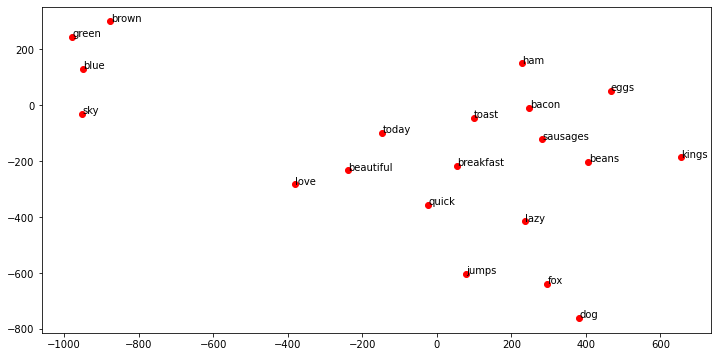

In [58]:
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Looking at term semantic similarity

In [59]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=unique_words, columns=unique_words)
similarity_df

,love,quick,breakfast,blue,dog,jumps,kings,beautiful,beans,green,today,fox,eggs,sky,bacon,lazy,sausages,toast,ham,brown
love,1.000000,0.179513,0.248741,0.174761,0.233190,0.096790,0.174145,0.583773,0.186205,0.188962,0.284772,0.079268,0.143901,0.199313,0.115246,0.165050,0.188998,0.194567,0.057496,0.202454
quick,0.179513,1.000000,0.329268,0.082821,0.212741,0.261009,0.055522,0.257739,0.202361,0.212049,0.283282,0.003717,0.102922,0.028834,0.114120,0.232939,0.237747,0.142354,0.066001,0.144577
breakfast,0.248741,0.329268,1.000000,0.126405,0.269188,0.098489,0.161264,0.376880,0.400320,0.264153,0.383621,-0.013405,0.379243,0.079245,0.466563,0.185971,0.518220,0.558907,0.386419,0.270948
blue,0.174761,0.082821,0.126405,1.000000,0.135320,0.157356,0.157707,0.405862,0.214204,0.744065,0.097223,0.308713,0.129324,0.469081,0.149656,0.060606,0.156515,0.129439,0.079979,0.671114
dog,0.233190,0.212741,0.269188,0.135320,1.000000,0.218082,0.012827,0.200093,0.193062,0.095792,0.083778,0.505732,0.231863,0.064700,0.185360,0.197494,0.237239,0.097297,0.162691,0.209964
jumps,0.096790,0.261009,0.098489,0.157356,0.218082,1.000000,0.016656,0.101878,0.078380,0.118674,0.024164,0.215905,0.137903,0.274471,-0.012451,0.097227,0.057436,0.029780,-0.037652,0.102126
kings,0.174145,0.055522,0.161264,0.157707,0.012827,0.016656,1.000000,0.244985,0.125885,0.156652,0.219406,0.094101,0.149547,0.152930,0.069831,-0.022814,0.311361,0.108454,-0.018844,0.177645
beautiful,0.583773,0.257739,0.376880,0.405862,0.200093,0.101878,0.244985,1.000000,0.219528,0.474428,0.379662,0.155214,0.167463,0.317680,0.119129,0.160029,0.254617,0.238517,0.065874,0.375549
beans,0.186205,0.202361,0.400320,0.214204,0.193062,0.078380,0.125885,0.219528,1.000000,0.392007,0.108890,0.096549,0.460948,0.103234,0.511582,0.102601,0.604881,0.435954,0.443734,0.459392
green,0.188962,0.212049,0.264153,0.744065,0.095792,0.118674,0.156652,0.474428,0.392007,1.000000,0.176654,0.171780,0.226500,0.355054,0.204442,0.043046,0.270824,0.183584,0.115664,0.677107


In [60]:
feature_names = np.array(unique_words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

love         [beautiful, today, breakfast]
quick            [breakfast, today, jumps]
breakfast         [toast, sausages, bacon]
blue                   [green, brown, sky]
dog             [fox, breakfast, sausages]
jumps                    [sky, quick, dog]
kings         [sausages, beautiful, today]
beautiful              [love, green, blue]
beans              [sausages, bacon, eggs]
green             [blue, brown, beautiful]
today         [breakfast, beautiful, love]
fox                     [dog, blue, brown]
eggs              [sausages, bacon, beans]
sky               [blue, green, beautiful]
bacon               [ham, sausages, toast]
lazy                     [quick, fox, dog]
sausages               [bacon, ham, beans]
toast              [bacon, ham, breakfast]
ham               [bacon, sausages, toast]
brown                 [green, blue, beans]
dtype: object

# The FastText Model

The FastText model was first introduced by Facebook in 2016 as an extension and supposedly improvement of the vanilla Word2Vec model. Based on the original paper titled ‘Enriching Word Vectors with Subword Information’ by Mikolov et al. which is an excellent read to gain an in-depth understanding of how this model works. Overall, FastText is a framework for learning word representations and also performing robust, fast and accurate text classification. The framework is open-sourced by Facebook on GitHub and claims to have the following.

- Recent state-of-the-art English word vectors.
- Word vectors for 157 languages trained on Wikipedia and Crawl.
- Models for language identification and various supervised tasks.

Though I haven't implemented this model from scratch, based on the research paper, following is what I learnt about how the model works. In general, predictive models like the Word2Vec model typically considers each word as a distinct entity (e.g. where) and generates a dense embedding for the word. However this poses to be a serious limitation with languages having massive vocabularies and many rare words which may not occur a lot in different corpora.

The Word2Vec model typically ignores the morphological structure of each word and considers a word as a single entity. The FastText model **considers each word as a Bag of Character n-grams**. This is also called as a **subword model** in the paper.

We add special boundary symbols **<** and **>** at the beginning and end of words. This enables us to distinguish prefixes and suffixes from other character sequences. We also include the word **w** itself in the set of its n-grams, to learn a representation for each word (in addition to its character n-grams).

Taking the word where and **n=3 (tri-grams)** as an example, it will be represented by the **character n-grams: <wh, whe, her, ere, re>** and the special sequence **< where >** representing the whole word. Note that the sequence , corresponding to the word **< her >** is different from the tri-gram **her** from the word **where**.

In practice, the paper recommends in extracting all the n-grams for **n ≥ 3** and **n ≤ 6**. This is a very simple approach, and different sets of n-grams could be considered, for example taking all prefixes and suffixes. We typically associate a vector representation (embedding) to each n-gram for a word.

Thus, we can represent a word by the sum of the vector representations of its n-grams or the average of the embedding of these n-grams. Thus, due to this effect of leveraging n-grams from individual words based on their characters, there is a higher chance for rare words to get a good representation since their character based n-grams should occur across other words of the corpus.

# Robust FastText Model with Gensim

The **gensim** package has nice wrappers providing us interfaces to leverage the FastText model available under the gensim.models.fasttext module. Let’s apply this once again on our toy corpus.

In [ ]:
(tokenized_corpus, vector_size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, epochs=5000)

In [62]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, vector_size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, epochs=5000)
ft_model

/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/keiziapurba/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


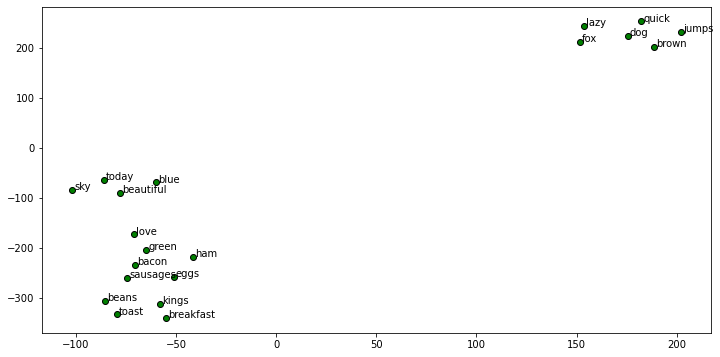

In [64]:
# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index_to_key
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Embedding Operations

In [65]:
ft_model.wv['sky'], ft_model.wv['sky'].shape

(array([ 0.8354679 ,  0.24270937,  1.5270482 ,  0.29889134, -0.20860039,
        -0.17280957,  0.2009739 ,  0.71061313,  0.8451077 ,  0.23712301,
        -0.0509496 , -0.50620085,  0.0536426 , -0.8318011 ,  0.30094525],
       dtype=float32),
 (15,))

In [66]:
print(ft_model.wv.similarity(w1='ham', w2='sky'))
print(ft_model.wv.similarity(w1='ham', w2='sausages'))

0.3631966
0.95235574


In [67]:
st1 = "dog fox ham"
print('Odd one out for [',st1, ']:',  
      ft_model.wv.doesnt_match(st1.split()))

st2 = "bacon ham sky sausages"
print('Odd one out for [',st2, ']:', 
      ft_model.wv.doesnt_match(st2.split()))

Odd one out for [ dog fox ham ]: ham
Odd one out for [ bacon ham sky sausages ]: sky


### Getting document level embeddings

Now suppose we wanted to cluster the eight documents from our toy corpus, we would need to get the document level embeddings from each of the words present in each document. One strategy would be to average out the word embeddings for each word in a document. This is an extremely useful strategy and you can adopt the same for your own problems. Let’s apply this now on our corpus to get features for each document.

In [70]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [71]:
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.633224,0.241109,1.336286,0.227798,-0.196780,-0.039579,0.184827,0.730348,0.824477,0.126218,-0.025842,-0.348504,0.098324,-0.786467,0.234595
1,0.558180,0.151005,1.171184,0.287862,-0.219503,-0.049056,0.193210,0.688771,0.583352,0.177741,-0.110026,-0.388595,0.054427,-0.672323,0.224093
2,-0.714791,-0.460922,1.369773,-0.143889,0.404819,0.906332,0.107537,0.466878,0.489146,-0.690582,0.451690,0.332470,-0.088589,-0.898453,-0.215381
3,-0.369935,-0.693844,0.548159,0.798238,-0.120878,0.261229,0.257672,1.025583,-0.979814,0.572465,-0.527470,-0.788771,-0.573670,-0.596745,0.486590
4,-0.005354,-0.499769,0.598558,0.644029,-0.199926,0.119552,0.221546,0.770649,-0.690052,0.469918,-0.544808,-0.664936,-0.435627,-0.498187,0.462443
5,-0.524913,-0.349459,1.343731,-0.115450,0.314273,0.762364,0.118351,0.495899,0.555722,-0.595158,0.390288,0.242537,-0.047782,-0.861928,-0.161288
6,0.675773,0.260902,1.350646,0.276515,-0.224001,-0.084514,0.198552,0.759499,0.851364,0.165621,-0.023771,-0.400847,0.123324,-0.789908,0.229319
7,-0.698170,-0.448786,1.392484,-0.131797,0.401764,0.901194,0.105864,0.462250,0.512573,-0.685103,0.454156,0.336223,-0.081693,-0.904762,-0.211872


### Trying out document clustering

Now that we have our features for each document, let’s cluster these documents using the Affinity Propagation algorithm, which is a clustering algorithm based on the concept of “message passing” between data points and does not need the number of clusters as an explicit input which is often required by partition-based clustering algorithms.

In [72]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(ft_doc_features)

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, 
                              columns=['ClusterLabel'])

pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,1
4,"I love green eggs, ham, sausages and bacon!",food,1
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,0
7,The dog is lazy but the brown fox is quick!,animals,2


We can see that our algorithm has clustered each document into the right group based on our Word2Vec features. Pretty neat! We can also visualize how each document in positioned in each cluster by using Principal Component Analysis (PCA) to reduce the feature dimensions to 2-D and then visualizing the same (by color coding each cluster).



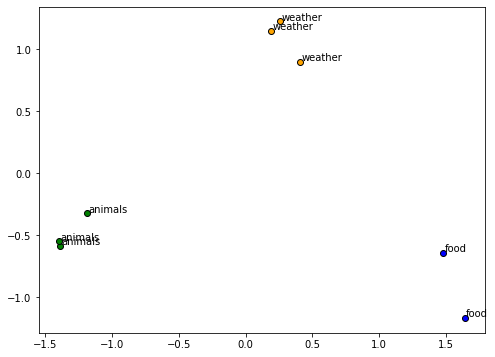

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(ft_doc_features)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
                 textcoords='offset points')

Everything looks to be in order as documents in each cluster are closer to each other and far apart from other clusters.